In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [5]:
#DataSet - https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
TempData = pd.read_csv("C:/Users/amans/Documents/Datasets/GlobalLandTemperaturesByCity.csv")
TempData.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [10]:
TempData = TempData.dropna()
df_Denmark = TempData[TempData.Country == 'Denmark']

df_Denmark.index = pd.to_datetime(df_Denmark.dt)
df_Denmark = df_Denmark.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df_Denmark.head(2)


,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E


In [11]:
df_Denmark.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [9]:
ts = df_Denmark['AverageTemperature']
ts.head()

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
Name: AverageTemperature, dtype: float64

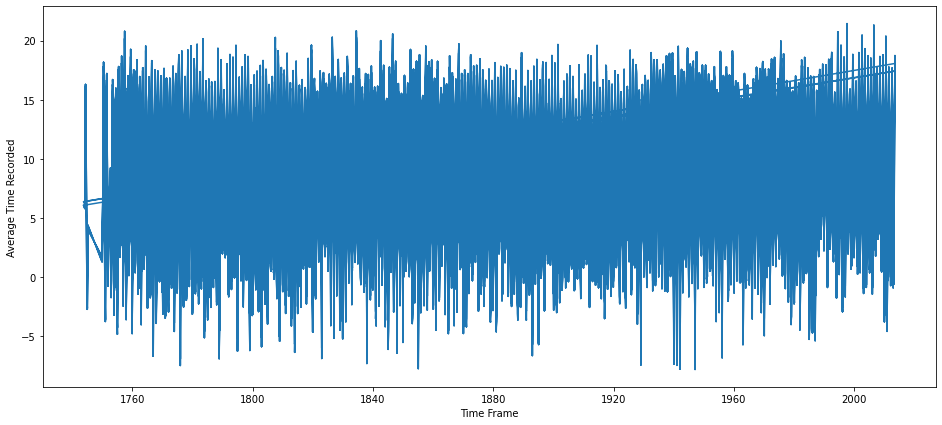

In [12]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Time Recorded')
ax1.plot(ts)

In [14]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.764430391800635
p-value: 2.3746970456357455e-27
Critial Values:
   1%, -3.430868192869495
Critial Values:
   5%, -2.86176901566292
Critial Values:
   10%, -2.566891900059256


In [17]:
#First model
import warnings
warnings.filterwarnings("ignore")
newmodel = ARMA(ts,order=(1,1))
results = newmodel.fit()

predictions = results.predict('01/01/1990', '01/01/1991')

In [20]:
actuals = df_Denmark['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]

In [21]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.812791


In [22]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(ts,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:83922.21129983963
ARMA(0, 1) - AIC:72682.79463953804
ARMA(0, 3) - AIC:63785.44572705118
ARMA(1, 0) - AIC:69020.3114679133
ARMA(1, 1) - AIC:65268.10421609709
ARMA(1, 2) - AIC:63179.84801382831
ARMA(1, 3) - AIC:66639.60428407839
ARMA(2, 0) - AIC:60366.309092606614
ARMA(2, 2) - AIC:52219.29608313451
ARMA(2, 3) - AIC:50711.73385010431
ARMA(3, 0) - AIC:56175.94555218019
ARMA(3, 1) - AIC:53338.63499200866
ARMA(3, 2) - AIC:50395.145088368474
ARMA(3, 3) - AIC:50388.75562366718


In [23]:
predictions = results.predict('01/01/1990', '01/01/1991')

In [24]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.494565
